# Adrian Khlim

In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('US_Accidents_March23.csv', chunksize=500_000 )
us_accidents = next( df )

In [240]:
us_accidents.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [241]:
for col in us_accidents.columns:
    print(col)

ID
Source
Severity
Start_Time
End_Time
Start_Lat
Start_Lng
End_Lat
End_Lng
Distance(mi)
Description
Street
City
County
State
Zipcode
Country
Timezone
Airport_Code
Weather_Timestamp
Temperature(F)
Wind_Chill(F)
Humidity(%)
Pressure(in)
Visibility(mi)
Wind_Direction
Wind_Speed(mph)
Precipitation(in)
Weather_Condition
Amenity
Bump
Crossing
Give_Way
Junction
No_Exit
Railway
Roundabout
Station
Stop
Traffic_Calming
Traffic_Signal
Turning_Loop
Sunrise_Sunset
Civil_Twilight
Nautical_Twilight
Astronomical_Twilight


In [242]:
us_accidents["City"].value_counts()

City
Houston         26484
Los Angeles     18827
Austin          18528
Dallas          17365
Atlanta          9389
                ...  
Dobbins             1
Oregon House        1
Travis Afb          1
Oakmont             1
De Soto             1
Name: count, Length: 4457, dtype: int64

In [243]:
print(us_accidents["Weather_Condition"].unique())

['Light Rain' 'Overcast' 'Mostly Cloudy' 'Rain' 'Light Snow' 'Haze'
 'Scattered Clouds' 'Partly Cloudy' 'Clear' 'Snow'
 'Light Freezing Drizzle' 'Light Drizzle' 'Fog' 'Shallow Fog' 'Heavy Rain'
 'Light Freezing Rain' 'Cloudy' 'Drizzle' nan 'Light Rain Showers' 'Mist'
 'Smoke' 'Patches of Fog' 'Light Freezing Fog' 'Light Haze'
 'Light Thunderstorms and Rain' 'Thunderstorms and Rain' 'Fair'
 'Volcanic Ash' 'Blowing Sand' 'Blowing Dust / Windy' 'Widespread Dust'
 'Fair / Windy' 'Rain Showers' 'Mostly Cloudy / Windy'
 'Light Rain / Windy' 'Hail' 'Heavy Drizzle' 'Showers in the Vicinity'
 'Thunderstorm' 'Light Rain Shower' 'Light Rain with Thunder'
 'Partly Cloudy / Windy' 'Thunder in the Vicinity' 'T-Storm'
 'Heavy Thunderstorms and Rain' 'Thunder' 'Heavy T-Storm' 'Funnel Cloud'
 'Heavy T-Storm / Windy' 'Blowing Snow' 'Light Thunderstorms and Snow'
 'Heavy Snow' 'Low Drifting Snow' 'Light Ice Pellets' 'Ice Pellets'
 'Squalls' 'N/A Precipitation' 'Cloudy / Windy' 'Light Fog' 'Sand'
 'Snow G

Firstly, I knew severity was something great to predict, and that latitude and longitude would be too much right now. Looking at my columns along with Weather Condition types and Sunset/Sunrise, I would like to predict the severity of an accident based on the rain and day or night time. I am thinking we combine and drop some of these values, because there's so many. For example, Light Freezing Rain and Light Rain can go together, as this is more of "how much rain" affects accidents, and not necessarily how specific the rain is. Thus, I will group the weather conditions into rain categories, and put them into a dictionary to map them into a new column.

In [244]:
# Simplify Weather Conditions, I'm just looking at RAIN, not storms or ashes or snow.

weather_map = {

    # FAIR
    'Fair': 'Fair',
    'Clear': 'Fair',
    'Fair / Windy': 'Fair',

    # LIGHT RAIN
    'Light Rain': 'Light Rain',
    'Light Drizzle': 'Light Rain',
    'Light Rain Showers': 'Light Rain',
    'Light Rain Shower': 'Light Rain',
    'Light Rain with Thunder': 'Light Rain',

    # RAIN
    'Rain': 'Rain',
    'Rain Showers': 'Rain',
    'Showers in the Vicinity': 'Rain',
    'Drizzle': 'Rain',
    'Thunderstorms and Rain': 'Rain',
    'Light Thunderstorms and Rain': 'Rain',
    'Thunderstorm': 'Rain',
    'Thunder in the Vicinity': 'Rain',

    # HEAVY RAIN
    'Heavy Rain': 'Heavy Rain',
    'Heavy Drizzle': 'Heavy Rain',
}


us_accidents['Weather_Simple'] = us_accidents['Weather_Condition'].map(weather_map)

# Drop the other weather conditions we are not interested in
us_accidents = us_accidents.dropna(subset=['Weather_Simple'])

In [245]:
print(us_accidents['Weather_Simple'].value_counts())


Weather_Simple
Fair          207526
Light Rain     21688
Rain            6830
Heavy Rain      1343
Name: count, dtype: int64


In [246]:
drop_cols = [
    "Start_Time",
    "End_Time",
    "Start_Lat",
    "Start_Lng",
    "End_Lat",
    "End_Lng",
    "Distance(mi)",
    "Description",
    "Street",
    "County",
    "Zipcode",
    "Country",
    "Timezone",
    "Airport_Code",
    "Weather_Timestamp",
    "Temperature(F)",
    "Wind_Chill(F)",
    "Humidity(%)",
    "Pressure(in)",
    "Wind_Direction",
   "Amenity",
    "Bump",
    "Crossing",
    "Give_Way",
    "Junction",
    "No_Exit",
    "Railway",
    "Roundabout",
    "Station",
    "Stop",
    "Traffic_Calming",
    "Traffic_Signal",
    "Turning_Loop",
    "Civil_Twilight",
    "Nautical_Twilight",
    "Astronomical_Twilight"
]
us_accidents.drop(columns=drop_cols, inplace=True)

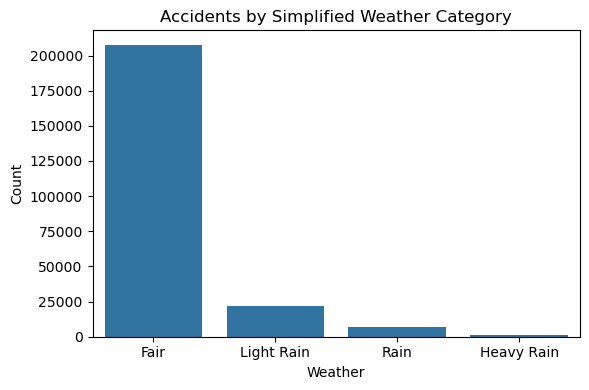

In [247]:
plt.figure(figsize=(6,4))
sns.countplot(data=us_accidents, x='Weather_Simple',
              order=us_accidents['Weather_Simple'].value_counts().index)
plt.title('Accidents by Simplified Weather Category')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


I wanted to see how much data we are working with, and it looks like MOST of our data is in the Fair category. Fortunately I mostly want to see the rain categories and they are a little bit more even, however fair is important too because we are looking at severity proportions, which we can visualize next. One important thing to note is that severity is linked to how much impact the accident has on traffic, 4 being the most impact. This means that it does not mean 4 is the most deadly, although they may correlate.

In [248]:
severity_counts = (
    us_accidents.groupby(['Weather_Simple', 'Severity'])
    .size()
    .reset_index(name='Count') # make the collumn from .size() into a proper column
)

severity_counts

,Weather_Simple,Severity,Count
0,Fair,1,176
1,Fair,2,132878
2,Fair,3,74394
3,Fair,4,78
4,Heavy Rain,1,1
5,Heavy Rain,2,732
6,Heavy Rain,3,609
7,Heavy Rain,4,1
8,Light Rain,1,12
9,Light Rain,2,12741


In [249]:
# Compute total accidents per weather category
totals = severity_counts.groupby('Weather_Simple')['Count'].sum().reset_index(name='Total')

# Merge totals back into severity_counts
severity_percent = severity_counts.merge(totals, on='Weather_Simple')

# Compute percentage
severity_percent['Percent'] = severity_percent['Count'] / severity_percent['Total']


In [250]:
totals

,Weather_Simple,Total
0,Fair,207526
1,Heavy Rain,1343
2,Light Rain,21688
3,Rain,6830


In [251]:
severity_percent

,Weather_Simple,Severity,Count,Total,Percent
0,Fair,1,176,207526,0.000848
1,Fair,2,132878,207526,0.640296
2,Fair,3,74394,207526,0.358480
3,Fair,4,78,207526,0.000376
4,Heavy Rain,1,1,1343,0.000745
5,Heavy Rain,2,732,1343,0.545048
6,Heavy Rain,3,609,1343,0.453462
7,Heavy Rain,4,1,1343,0.000745
8,Light Rain,1,12,21688,0.000553
9,Light Rain,2,12741,21688,0.587468


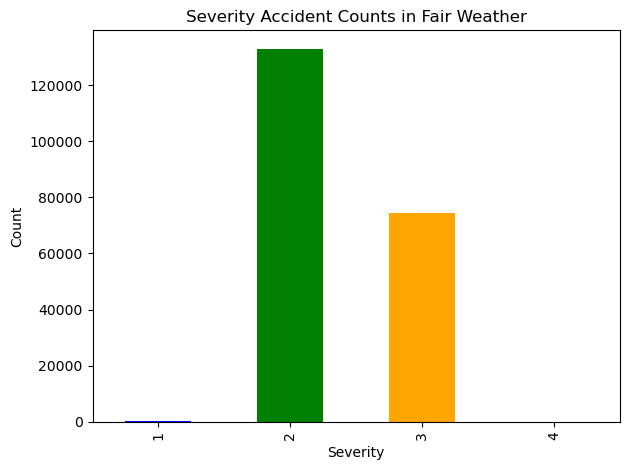

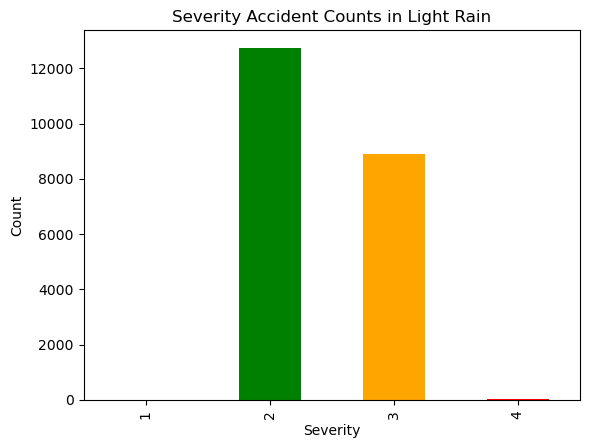

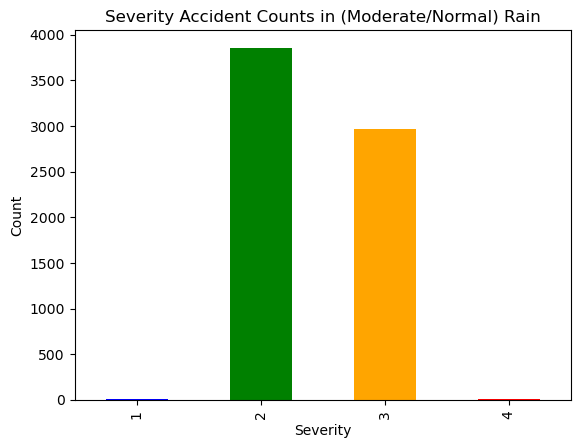

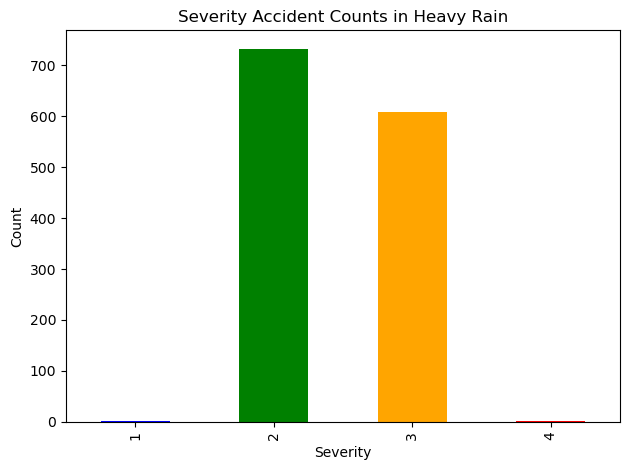

In [252]:
severity_colors = ['blue', 'green', 'orange', 'red']
fair_severity_percent = severity_percent[severity_percent["Weather_Simple"] == "Fair"]
fair_severity_percent.plot(kind='bar', x='Severity', y='Count', color=severity_colors, legend=False)
plt.title("Severity Accident Counts in Fair Weather")
plt.ylabel("Count")

plt.tight_layout()
light_rain_severity_percent = severity_percent[severity_percent["Weather_Simple"] == "Light Rain"]
light_rain_severity_percent.plot(kind='bar', x='Severity', y='Count', color=severity_colors, legend=False)
plt.title("Severity Accident Counts in Light Rain")
plt.ylabel("Count")

rain_severity_percent = severity_percent[severity_percent["Weather_Simple"] == "Rain"]
rain_severity_percent.plot(kind='bar', x='Severity', y='Count', color=severity_colors, legend=False)
plt.title("Severity Accident Counts in (Moderate/Normal) Rain")
plt.ylabel("Count")

heavy_rain_severity_percent = severity_percent[severity_percent["Weather_Simple"] == "Heavy Rain"]
heavy_rain_severity_percent.plot(kind='bar', x='Severity', y='Count', color=severity_colors, legend=False)
plt.title("Severity Accident Counts in Heavy Rain")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

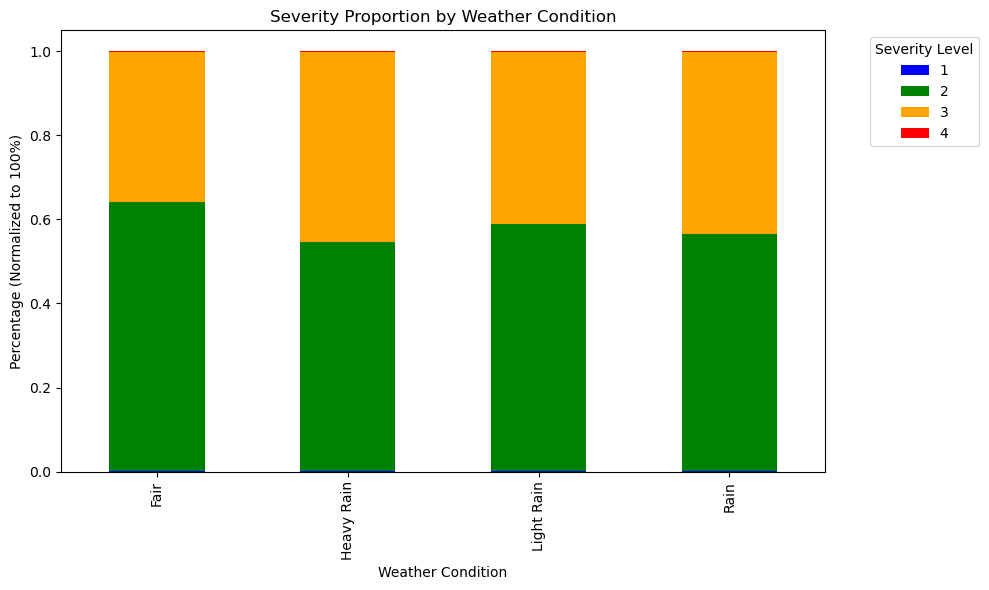

In [253]:
plt.figure(figsize=(10,6))

# Pivot for easier plotting
pivot = severity_percent.pivot(index='Weather_Simple', columns='Severity', values='Percent') # transpose so the rows are the weather conditions and the columns are the severity levels
pivot = pivot.fillna(0) 
# Make stacked bar plot
pivot.plot(kind='bar', stacked=True, color=severity_colors, figsize=(10,6))

plt.title("Severity Proportion by Weather Condition")
plt.ylabel("Percentage (Normalized to 100%)")
plt.xlabel("Weather Condition")
plt.legend(title="Severity Level", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [254]:
pivot

Severity,1,2,3,4
Weather_Simple,,,,
Fair,0.000848,0.640296,0.358480,0.000376
Heavy Rain,0.000745,0.545048,0.453462,0.000745
Light Rain,0.000553,0.587468,0.410965,0.001014
Rain,0.000586,0.564568,0.433675,0.001171


Above, we can see that most accidents in all categories range between severity levels 2 and 3. Now, let's classify rows as Night accidents or Day accidents.

In [255]:
us_accidents['Is_Night'] = (us_accidents['Sunrise_Sunset'] == 'Night').astype(int)

us_accidents.head()

,ID,Source,Severity,City,State,Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Weather_Simple,Is_Night
0,A-1,Source2,3,Dayton,OH,10.0,NaN,0.02,Light Rain,Night,Light Rain,1
1,A-2,Source2,2,Reynoldsburg,OH,10.0,NaN,0.00,Light Rain,Night,Light Rain,1
5,A-6,Source2,3,Westerville,OH,7.0,3.5,0.03,Light Rain,Day,Light Rain,0
9,A-10,Source2,3,Westerville,OH,3.0,4.6,0.02,Light Rain,Day,Light Rain,0
10,A-11,Source2,3,Columbus,OH,5.0,5.8,NaN,Rain,Day,Rain,0


In [256]:
severity_day_night = (
    us_accidents.groupby(['Sunrise_Sunset', 'Severity'])
    .size()
    .reset_index(name='Count')
)

severity_day_night


,Sunrise_Sunset,Severity,Count
0,Day,1,126
1,Day,2,106384
2,Day,3,58450
3,Day,4,68
4,Night,1,67
5,Night,2,43810
6,Night,3,28425
7,Night,4,41


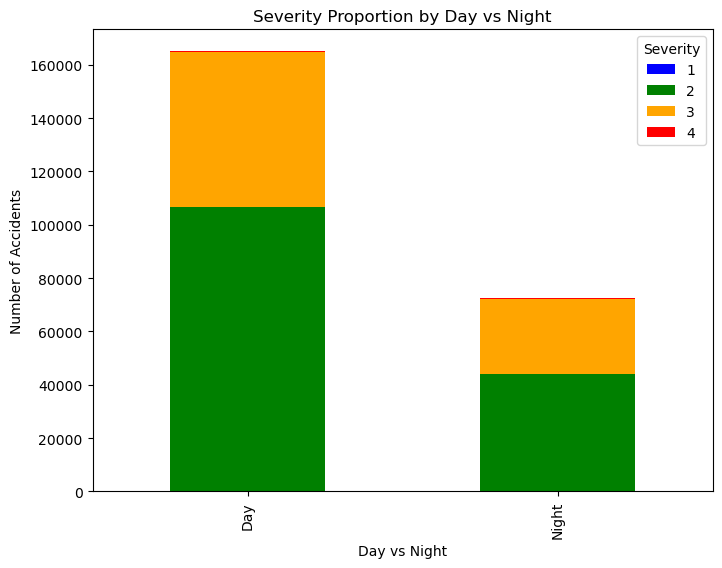

In [257]:
day_night_pivot = severity_day_night.pivot(index='Sunrise_Sunset', columns='Severity', values='Count')
day_night_pivot = day_night_pivot.fillna(0)

day_night_pivot.plot(kind='bar', stacked=True, color=severity_colors, figsize=(8,6))
plt.title("Severity Proportion by Day vs Night")
plt.xlabel("Day vs Night")
plt.ylabel("Number of Accidents")
plt.show()

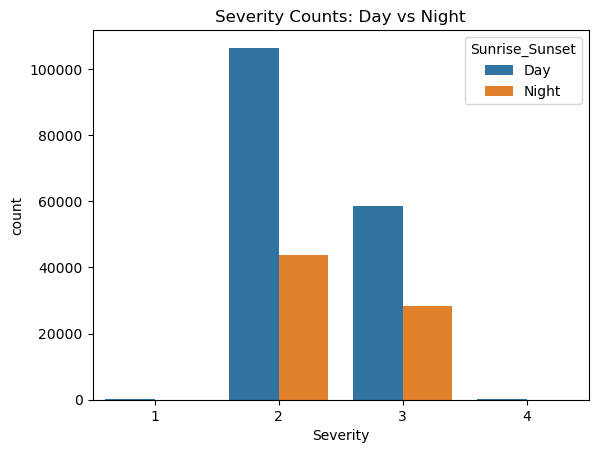

In [258]:
sns.countplot(data=us_accidents, x='Severity', hue='Sunrise_Sunset')
plt.title("Severity Counts: Day vs Night")
plt.show()


It's important to note that there is more recoreds of daytime accidents, and we do not know whether accident likeliness is correlated, as it might be due to more cars driving during the day, however in our case, we are just looking at the proportions. There seems to be a higher proportion of severity 3 accidents at night than there are severity 2. Meaning out of all the severity 3 accidents, the percentage of night time severity 3 accidents is higher than severity 2.

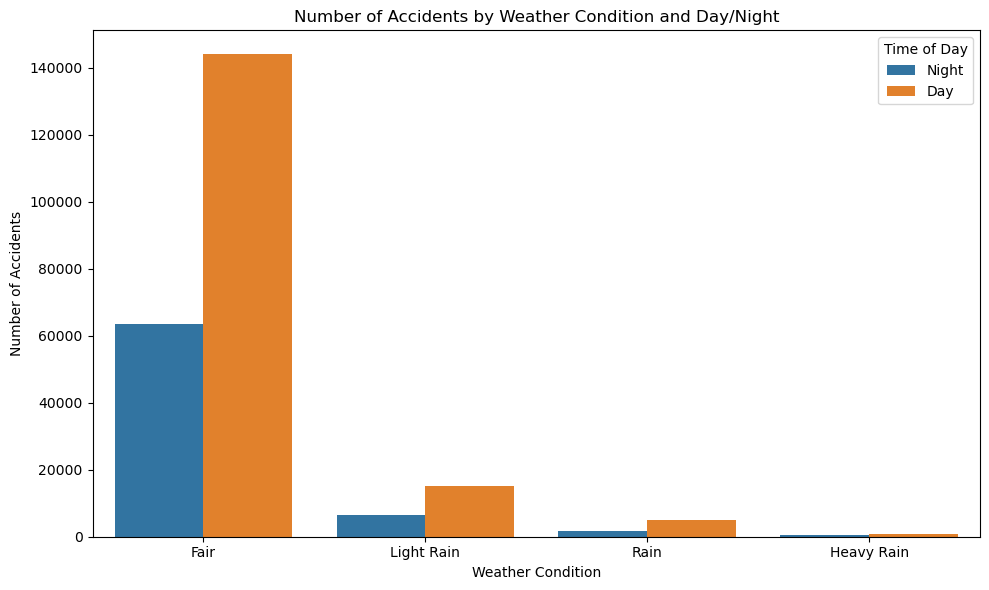

In [259]:
plt.figure(figsize=(10,6))

sns.countplot(
    data=us_accidents,
    x='Weather_Simple',
    hue='Sunrise_Sunset',   # Day vs Night
    order=['Fair', 'Light Rain', 'Rain', 'Heavy Rain']
)

plt.title("Number of Accidents by Weather Condition and Day/Night")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")

plt.legend(title="Time of Day")
plt.tight_layout()
plt.show()

Now two things, before the severity levels were mostly 2 to 3, so I may group and classify severity levels in a binary manner. But also, as you can see here, there are just too many "Fair" units. Let us look at just the Rain ones, to get a clearer picture of proportions.

In [260]:
rain_df = us_accidents[us_accidents['Weather_Simple'] != 'Fair']
rain_df.head()

,ID,Source,Severity,City,State,Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Weather_Simple,Is_Night
0,A-1,Source2,3,Dayton,OH,10.0,NaN,0.02,Light Rain,Night,Light Rain,1
1,A-2,Source2,2,Reynoldsburg,OH,10.0,NaN,0.00,Light Rain,Night,Light Rain,1
5,A-6,Source2,3,Westerville,OH,7.0,3.5,0.03,Light Rain,Day,Light Rain,0
9,A-10,Source2,3,Westerville,OH,3.0,4.6,0.02,Light Rain,Day,Light Rain,0
10,A-11,Source2,3,Columbus,OH,5.0,5.8,NaN,Rain,Day,Rain,0


In [261]:
rain_df.tail()

,ID,Source,Severity,City,State,Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Weather_Simple,Is_Night
499837,A-499850,Source2,3,Atlanta,GA,10.0,12.7,NaN,Light Thunderstorms and Rain,Day,Rain,0
499843,A-499856,Source2,2,Atlanta,GA,9.0,8.1,0.01,Light Rain,Night,Light Rain,1
499897,A-499910,Source2,2,Augusta,GA,10.0,10.4,0.00,Light Rain,Day,Light Rain,0
499942,A-499955,Source2,2,Augusta,GA,8.0,NaN,0.03,Light Rain,Day,Light Rain,0
499969,A-499982,Source2,2,Griffin,GA,10.0,13.8,NaN,Thunderstorm,Day,Rain,0


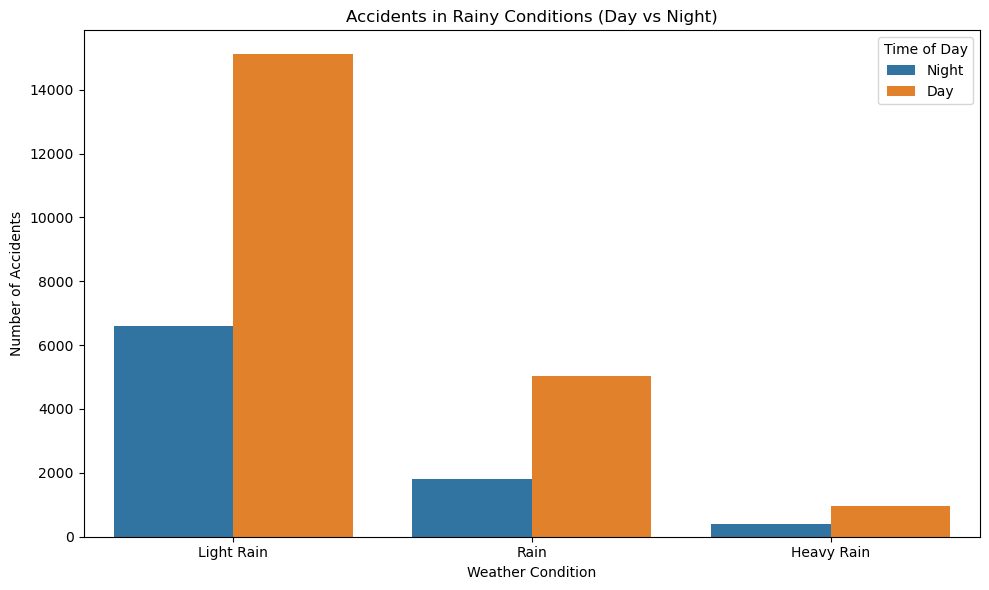

In [262]:
plt.figure(figsize=(10,6))

sns.countplot(
    data=rain_df,
    x='Weather_Simple',
    hue='Sunrise_Sunset',
    order=['Light Rain', 'Rain', 'Heavy Rain']
)

plt.title("Accidents in Rainy Conditions (Day vs Night)")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.legend(title="Time of Day")

plt.tight_layout()
plt.show()


When looking at 100k values, proportions looked a lot more even when it is raining. Meaning, relatively, there are more accidents at night when it rains than there are in the day time. However I was able to increase it to 500,000, and now it's looking like day time accidents heavily outweight night time. 

These are going to be our main points of data, our main features, but there is still some others such as Precipitation, Visibility, and Wind Speed. We can visualize those, and also make the severity levels binary for classification, and since almost all the data is in the 2 and 3 zones.

In [263]:
us_accidents['Severe'] = (us_accidents['Severity'] >= 3).astype(int)
us_accidents['Severe'].value_counts(normalize=True)


Severe
0    0.633565
1    0.366435
Name: proportion, dtype: float64

In [264]:
us_accidents["Visibility(mi)"].unique()
# Higher number means better visibility, in miles
us_accidents.dropna(subset=['Visibility(mi)'], inplace=True) # we see one thats empty

In [265]:
us_accidents["Visibility(mi)"].unique()

array([1.00e+01, 7.00e+00, 3.00e+00, 5.00e+00, 9.00e+00, 1.80e+00,
       8.00e+00, 4.00e+00, 2.50e+00, 6.00e+00, 2.00e+00, 1.50e+00,
       1.20e+00, 2.80e+00, 8.00e-01, 3.00e+01, 2.00e+01, 4.00e+01,
       2.50e+01, 1.00e+00, 5.00e-01, 8.00e+01, 2.00e-01, 1.50e+01,
       4.20e+00, 1.20e+01, 2.20e+00, 1.00e-01, 4.00e-01, 1.05e+02,
       6.00e-01, 2.50e-01, 7.50e-01, 3.50e+00, 1.30e+01, 0.00e+00,
       1.10e+01, 1.10e+00, 1.40e+00, 1.90e+00, 9.00e-01, 1.05e+01])

In [266]:
us_accidents["Visibility(mi)"].value_counts().sort_index()

Visibility(mi)
0.00           9
0.10          14
0.20         103
0.25           2
0.40           1
0.50         212
0.60           1
0.75           1
0.80         230
0.90           1
1.00         544
1.10           1
1.20         391
1.40           1
1.50         786
1.80         699
1.90           1
2.00        1754
2.20           4
2.50        1705
2.80           4
3.00        3040
3.50           1
4.00        2950
4.20           5
5.00        3339
6.00        2661
7.00        5891
8.00        4876
9.00        6325
10.00     199790
10.50          1
11.00         24
12.00         31
13.00        766
15.00         48
20.00        186
25.00          9
30.00         22
40.00          2
80.00          2
105.00         1
Name: count, dtype: int64

In [267]:
us_accidents["Visibility(mi)"].count()

236434

In [268]:
us_accidents["Precipitation(in)"].unique()
us_accidents.dropna(subset=['Precipitation(in)'], inplace=True)
us_accidents["Precipitation(in)"].unique()

array([2.000e-02, 0.000e+00, 3.000e-02, 6.000e-02, 1.800e-01, 1.600e-01,
       9.000e-02, 1.000e-01, 5.000e-02, 1.100e-01, 2.200e-01, 4.000e-02,
       8.000e-02, 1.900e-01, 1.000e-02, 7.000e-02, 1.500e-01, 1.200e-01,
       1.400e-01, 2.100e-01, 2.900e-01, 1.300e-01, 4.100e-01, 2.000e-01,
       4.900e-01, 3.100e-01, 3.200e-01, 2.500e-01, 2.400e-01, 1.700e-01,
       2.300e-01, 3.400e-01, 5.100e-01, 2.700e-01, 2.600e-01, 4.200e-01,
       4.700e-01, 4.400e-01, 3.000e-01, 3.300e-01, 2.800e-01, 3.800e-01,
       3.500e-01, 4.000e-01, 7.000e-01, 3.700e-01, 3.600e-01, 5.400e-01,
       1.310e+00, 4.600e-01, 7.600e-01, 1.680e+00, 1.040e+00, 1.080e+00,
       8.100e-01, 6.700e-01, 6.900e-01, 4.500e-01, 7.100e-01, 1.020e+00,
       5.200e-01, 8.600e-01, 8.900e-01, 5.000e-01, 9.000e-01, 5.600e-01,
       1.330e+00, 6.300e-01, 7.700e-01, 3.900e-01, 6.100e-01, 5.800e-01,
       8.300e-01, 5.300e-01, 1.010e+00, 4.800e-01, 1.270e+00, 6.200e-01,
       6.500e-01, 6.400e-01, 5.700e-01, 7.300e-01, 

In [269]:
us_accidents.dropna(subset=['Wind_Speed(mph)'], inplace=True)
us_accidents["Wind_Speed(mph)"].unique()

array([ 3.5,  4.6, 20.7, 17.3, 21.9, 18.4, 13.8,  9.2,  8.1, 15. , 12.7,
       16.1, 11.5,  5.8, 10.4,  6.9,  5. , 19.6, 24.2, 31.1, 23. , 26.5,
       27.6, 25.3, 29.9, 35.7, 42.6, 36.8, 32.2, 33.4,  8. ,  9. , 10. ,
        3. , 14. ,  0. ,  7. , 12. , 13. ,  6. ,  1. ,  2. , 17. , 16. ,
       28. , 20. , 26. , 18. ,  1.2, 34.5, 21. , 22. , 28.8, 41.4,  2.3,
       25. , 29. , 39.1, 24. , 30. , 44.9])

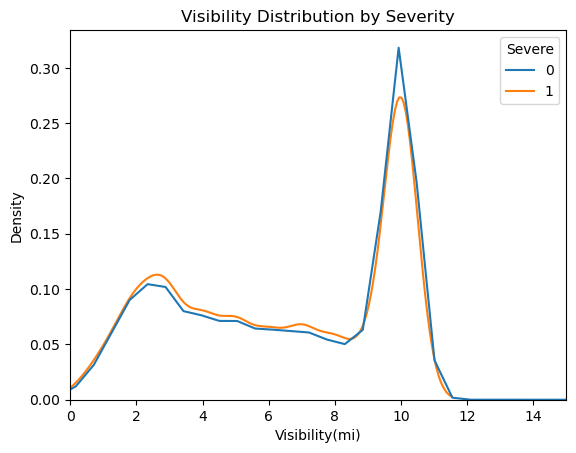

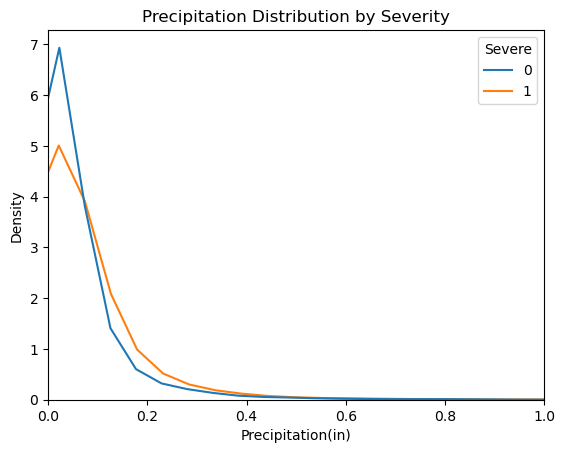

In [270]:
sns.kdeplot(data=us_accidents, x='Visibility(mi)', hue='Severe', common_norm=False)
plt.title("Visibility Distribution by Severity")
plt.xlim(0, 15)
plt.show()

sns.kdeplot(data=us_accidents, x='Precipitation(in)', hue='Severe', common_norm=False)
plt.title("Precipitation Distribution by Severity")
plt.xlim(0, 1)
plt.show()


We can see through this KDE (Kernel Density Estimate) chart that the lines overlap, meaning different level severity accidents are occuring under the same conditions, such as visibility. We can see there is a little bit of difference in precipitation, where Non severe accidents seem to be a littler more likely at low to no precipitation. This goes against what I would expect, as I would expect more accidents the less visible and the more rain, especially severe. 

However, over 9,000 cases show the accidents occuring at 10 miles of visibility, which is the highest recorded except 1 which is an outlier. This may mean that 10 miles could just be the default, so we may be able to exclude that and gain better insights.

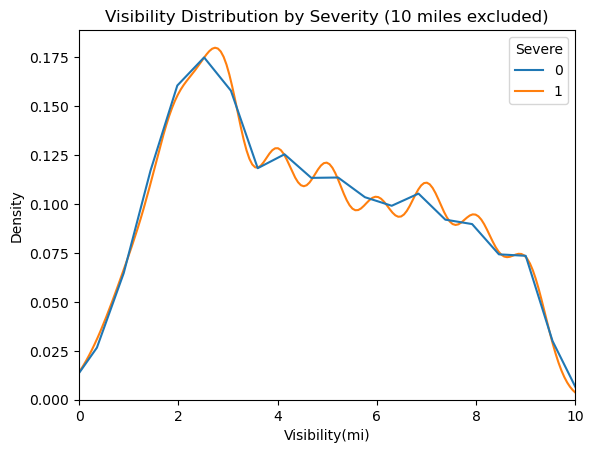

In [271]:
vis_filtered = us_accidents[us_accidents['Visibility(mi)'] != 10.0]
sns.kdeplot(
    data=vis_filtered,
    x='Visibility(mi)',
    hue='Severe',
    common_norm=False
)
plt.title("Visibility Distribution by Severity (10 miles excluded)")
plt.xlim(0, 10)
plt.show()


In [272]:
us_accidents[us_accidents['Visibility(mi)'] != 10.0].count()

ID                   16410
Source               16410
Severity             16410
City                 16410
State                16410
Visibility(mi)       16410
Wind_Speed(mph)      16410
Precipitation(in)    16410
Weather_Condition    16410
Sunrise_Sunset       16410
Weather_Simple       16410
Is_Night             16410
Severe               16410
dtype: int64

This is significant, we now see that it did seem to be a default, as it appears that accidents spike at 2-4 miles of visibility and trends downwards, right until that default. However, I should keep the data, because that means theres a lot of accidents that occur even when visibility is clear, but many also occur at lower visibilities.

In [273]:
us_accidents.count()

ID                   25918
Source               25918
Severity             25918
City                 25917
State                25918
Visibility(mi)       25918
Wind_Speed(mph)      25918
Precipitation(in)    25918
Weather_Condition    25918
Sunrise_Sunset       25917
Weather_Simple       25918
Is_Night             25918
Severe               25918
dtype: int64

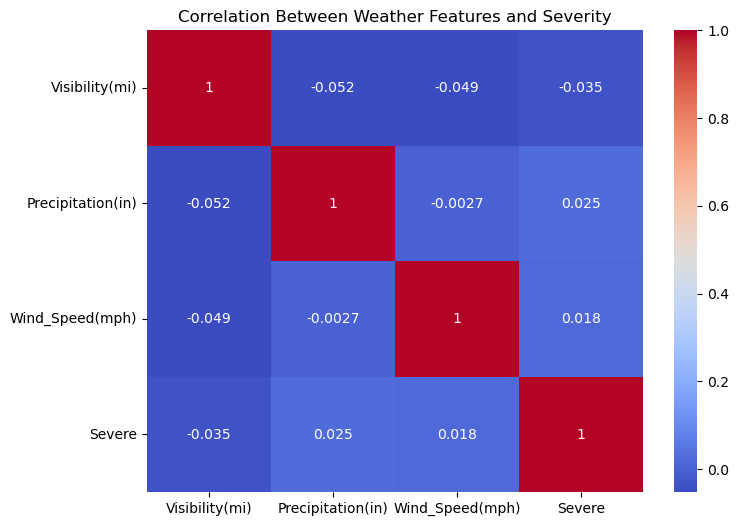

In [274]:
numeric_cols = ['Visibility(mi)', 
                'Precipitation(in)', 'Wind_Speed(mph)', 'Severe']

corr = us_accidents[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Weather Features and Severity")
plt.show()


We can see here that there does not seem to be a lot of correlation between features, and the charts from before hand also kind of show there isn't too much correlation. However, I think it is time to train our models and see if they can reflect the same thing. First lets use Logistic Regression to get a baseline comparison and also see which features may affect severity risk.

In [275]:
features = [
    'Weather_Simple',
    'Visibility(mi)',
    'Precipitation(in)',
    'Wind_Speed(mph)',
    'Is_Night'
]

df_model = us_accidents[features + ['Severe']].dropna()

# Encode the categorical Weather_Simple feature using one-hot encoding
df_model = pd.get_dummies(df_model, columns=['Weather_Simple'], drop_first=True)


In [276]:
from sklearn.model_selection import train_test_split

X = df_model.drop('Severe', axis=1)
y = df_model['Severe']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [277]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)


In [278]:
from sklearn.metrics import classification_report, confusion_matrix

print("Logistic Regression Results:\n")
print(classification_report(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))


Logistic Regression Results:

              precision    recall  f1-score   support

           0       0.60      1.00      0.75      3083
           1       0.71      0.00      0.00      2101

    accuracy                           0.60      5184
   macro avg       0.65      0.50      0.38      5184
weighted avg       0.64      0.60      0.45      5184

[[3081    2]
 [2096    5]]


Well here we can see that Logistic Regression either failed or the dataset or feature choices were not good. Using our features and logistic regression, we can see that It predicted all of the non-severe accidents correctly. However, it also predicted almost all the severe ones as non-severe, which is greatly incorrect, as we can see the recall is 0.00 meaning it never identifies severe accidents. This model is likely failing because there is strong overlap between severity groups in the features which can be seen from our previous charts, especially the KDE charts. I was going to use KNN next but I think Random Forest will capture nonlinear patterns better.

In [279]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'   # helps improve recall for class 1
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=300, n_jobs=-1,
                       random_state=42)

In [280]:
y_pred_rf = rf.predict(X_test)

print("Random Forest Results:\n")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Results:

              precision    recall  f1-score   support

           0       0.63      0.65      0.64      3083
           1       0.46      0.43      0.45      2101

    accuracy                           0.56      5184
   macro avg       0.54      0.54      0.54      5184
weighted avg       0.56      0.56      0.56      5184

[[2003 1080]
 [1190  911]]


This is a lot better! It can be seen that the recall accuracy was 43%, meaning RF accurately predicted 43% of severe accidents, a great jump from before. Recall for non-severe accidents is lower, but remember, logistic regression was predicting almost everything to be non-severe. Logistic regression needs a clear boundary, or linear separation, and our data did not seem to have that. Random forest instead learns different combinations of features, which logistic regression cannot do.

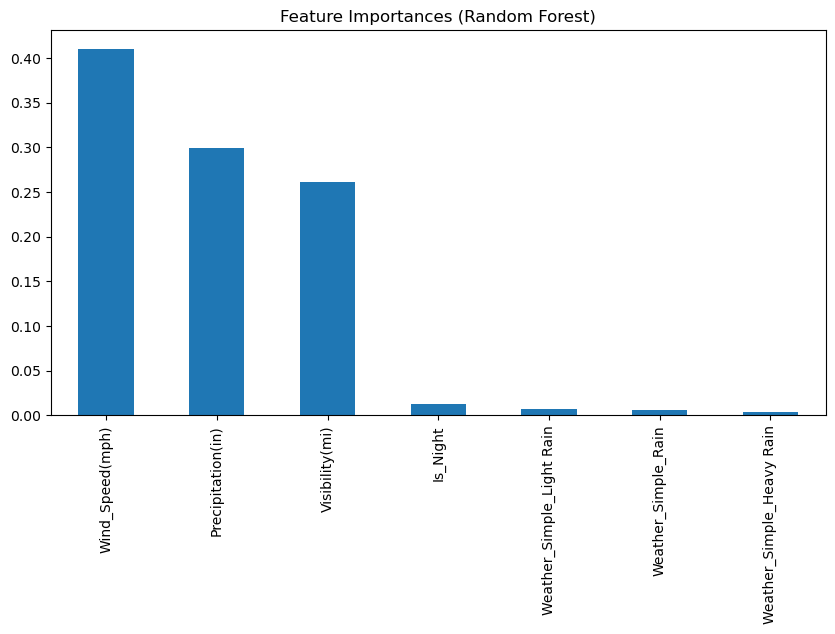

In [281]:
importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
feat_importances.plot(kind='bar', figsize=(10,5), title="Feature Importances (Random Forest)")
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [300, 500, 800],
    'max_depth': [10, 15, 20, None],
    'min_samples_leaf': [1, 3, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', {0:1, 1:2}, {0:1, 1:3}]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

rs = RandomizedSearchCV(
    rf, param_grid, n_iter=10, cv=3, scoring='f1', verbose=2
)

rs.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END class_weight=balanced, max_depth=15, max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.9s
[CV] END class_weight=balanced, max_depth=15, max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.9s
[CV] END class_weight=balanced, max_depth=15, max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.8s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=1, n_estimators=800; total time=   1.5s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=1, n_estimators=800; total time=   1.5s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=1, n_estimators=800; total time=   1.7s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=3, n_estimators=500; total time=   0.8s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   param_distributions={'class_weight': ['balanced',
                                                         {0: 1, 1: 2},
                                                         {0: 1, 1: 3}],
                                        'max_depth': [10, 15, 20, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 3, 5, 10],
                                        'n_estimators': [300, 500, 800]},
                   scoring='f1', verbose=2)

In [283]:
rs.best_params_


{'n_estimators': 500,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'class_weight': {0: 1, 1: 3}}

In [284]:
rf_best = RandomForestClassifier(
    n_estimators=300,
    min_samples_leaf=5,
    max_features='log2',
    max_depth=20,
    class_weight={0: 1, 1: 3},
    random_state=42,
    n_jobs=-1
)

rf_best.fit(X_train, y_train)

y_pred_best = rf_best.predict(X_test)

print("Tuned Random Forest Results:\n")
print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))

Tuned Random Forest Results:

              precision    recall  f1-score   support

           0       0.64      0.12      0.20      3083
           1       0.41      0.90      0.57      2101

    accuracy                           0.44      5184
   macro avg       0.53      0.51      0.38      5184
weighted avg       0.55      0.44      0.35      5184

[[ 362 2721]
 [ 202 1899]]


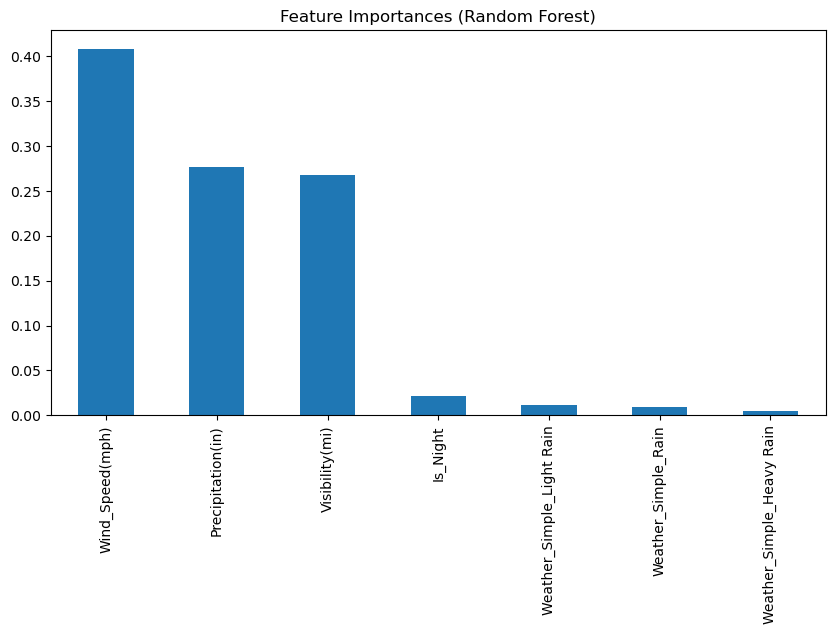

In [285]:
importances = rf_best.feature_importances_
feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
feat_importances.plot(kind='bar', figsize=(10,5), title="Feature Importances (Random Forest)")
plt.show()

Here we tried to use Randomize Search to get better hyperparameters, which lead to worse predictions on non-severe accidents and better recall on severe accidents, but that is because we adjusted the weight and made it so that the model would guess for severe accidents more since we made the weight of class 1 (severe accidents) 3, and non-severe 1.

The last thing I want to do is adjust input parameters, and include time.

In [296]:
df = pd.read_csv('US_Accidents_March23.csv', chunksize=500_000 )
us_accidents = next( df )

us_accidents['Weather_Simple'] = us_accidents['Weather_Condition'].map(weather_map)
us_accidents = us_accidents.dropna(subset=['Weather_Simple'])
drop_cols = [
    # "Start_Time",
    "End_Time",
    "Start_Lat",
    "Start_Lng",
    "End_Lat",
    "End_Lng",
    "Distance(mi)",
    "Description",
    "Street",
    "County",
    "Zipcode",
    "Country",
    "Timezone",
    "Airport_Code",
    "Weather_Timestamp",
    "Temperature(F)",
    "Wind_Chill(F)",
    "Humidity(%)",
    "Pressure(in)",
    "Wind_Direction",
   "Amenity",
    "Bump",
    "Crossing",
    "Give_Way",
    "Junction",
    "No_Exit",
    "Railway",
    "Roundabout",
    "Station",
    "Stop",
    "Traffic_Calming",
    "Traffic_Signal",
    "Turning_Loop",
    "Civil_Twilight",
    "Nautical_Twilight",
    "Astronomical_Twilight"
]
us_accidents.drop(columns=drop_cols, inplace=True)

us_accidents['Is_Night'] = (us_accidents['Sunrise_Sunset'] == 'Night').astype(int)
us_accidents['Severe'] = (us_accidents['Severity'] >= 3).astype(int)
us_accidents['Severe'].value_counts(normalize=True)
us_accidents.dropna(subset=['Visibility(mi)'], inplace=True)
us_accidents.dropna(subset=['Precipitation(in)'], inplace=True)
us_accidents.dropna(subset=['Wind_Speed(mph)'], inplace=True)

us_accidents['Start_Time'] = pd.to_datetime(us_accidents['Start_Time'], errors='coerce')
us_accidents['Hour'] = us_accidents['Start_Time'].dt.hour
us_accidents.dropna(subset=['Hour'], inplace=True)

In [297]:
features = [
    'Hour',
    'Weather_Simple',
    'Visibility(mi)',
    'Precipitation(in)',
    'Wind_Speed(mph)',
    'Is_Night'
]

df_model = us_accidents[features + ['Severe']].dropna()

# Encode the categorical Weather_Simple feature using one-hot encoding
df_model = pd.get_dummies(df_model, columns=['Weather_Simple'], drop_first=True)

In [298]:
X = df_model.drop('Severe', axis=1)
y = df_model['Severe']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [299]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'   
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300, n_jobs=-1,
                       random_state=42)

In [300]:
y_pred_rf = rf.predict(X_test)

print("Random Forest Results:\n")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Results:

              precision    recall  f1-score   support

           0       0.64      0.67      0.66      3083
           1       0.48      0.45      0.47      2101

    accuracy                           0.58      5184
   macro avg       0.56      0.56      0.56      5184
weighted avg       0.58      0.58      0.58      5184

[[2075 1008]
 [1152  949]]


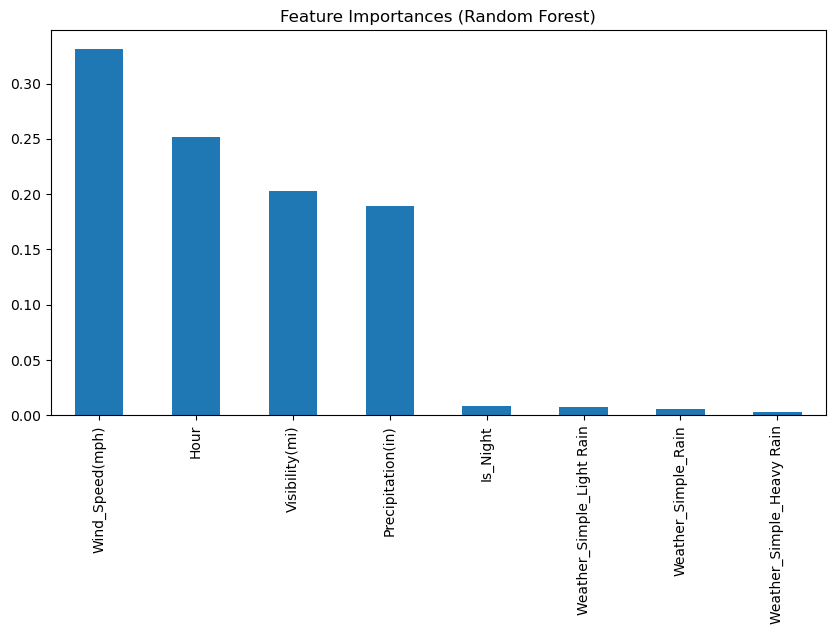

In [301]:
importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
feat_importances.plot(kind='bar', figsize=(10,5), title="Feature Importances (Random Forest)")
plt.show()

In [ ]:
param_grid = {
    'n_estimators': [300, 500, 800],
    'max_depth': [10, 15, 20, None],
    'min_samples_leaf': [1, 3, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', {0:1, 1:2}, {0:1, 1:3}]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

rs = RandomizedSearchCV(
    rf, param_grid, n_iter=10, cv=3, scoring='balanced_accuracy', verbose=2
)

rs.fit(X_train, y_train)


In [302]:
rf_best = RandomForestClassifier(
    n_estimators=300,
    min_samples_leaf=5,
    max_features='log2',
    max_depth=20,
    class_weight={0: 1, 1: 3},
    random_state=42,
    n_jobs=-1
)

rf_best.fit(X_train, y_train)

y_pred_best = rf_best.predict(X_test)

print("Tuned Random Forest Results:\n")
print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))

Tuned Random Forest Results:

              precision    recall  f1-score   support

           0       0.70      0.22      0.33      3083
           1       0.43      0.86      0.57      2101

    accuracy                           0.48      5184
   macro avg       0.57      0.54      0.45      5184
weighted avg       0.59      0.48      0.43      5184

[[ 668 2415]
 [ 284 1817]]


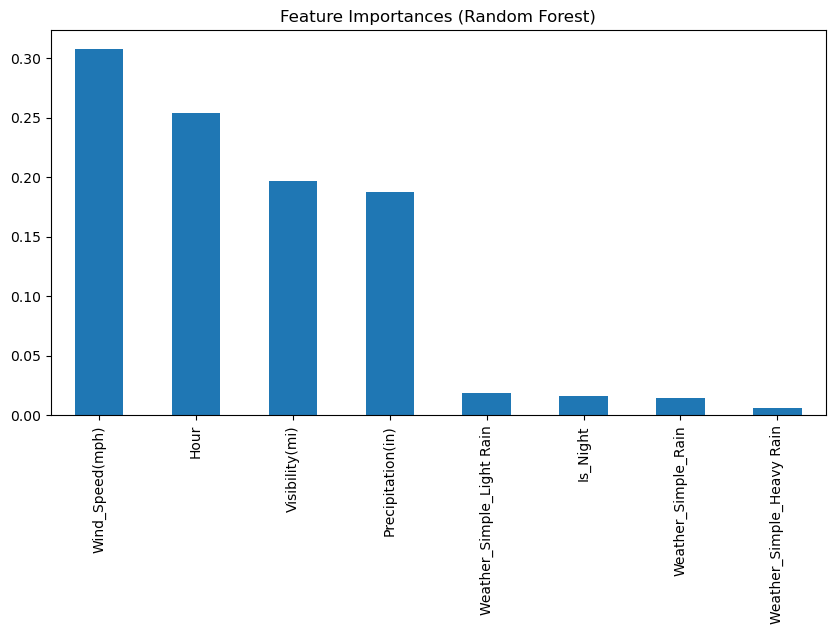

In [303]:
importances = rf_best.feature_importances_
feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
feat_importances.plot(kind='bar', figsize=(10,5), title="Feature Importances (Random Forest)")
plt.show()

Alas, I was correct. We slightly improved our